# Merger models of blue supergiants 


by [Earl Patrick Bellinger](https://earlbellinger.com)$^{1,2}$

$^1$_Max Planck Institute for Astrophysics, Garching, Germany_ \
$^2$_Stellar Astrophysics Centre, Aarhus, Denmark_

In [1]:
import os

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact, IntSlider

import seaborn as sns

In [2]:
sns.set(style="ticks", palette="muted", rc={"xtick.bottom" : True, "ytick.left" : True})
plt.style.use('thinfig')

In [3]:
red = "#CA0020"
orange = "#F97100" 
blue = "#0571b0"

In [4]:
import importlib
import star
importlib.reload(star)
from star import *

In [5]:
usecols_profiles = ['mass', 'x_mass_fraction_H', 'y_mass_fraction_He']
grid_merger = Grid("work/grid_merge", 
                   #load_history_extras=load_history_extras,
                   usecols_profiles=usecols_profiles,
                   #usecols_history=usecols_history,
                   cpus=8)

In [6]:
track = grid_merger.filter({'M': 15, 'mc': 0.5, 'mg': 0.25, 'Ye': 0.28, 'Z': 0.02}).iloc[0].Track

100%|██████████████████████████████████████████████████████████| 398/398 [00:00<00:00, 917215.93it/s]


100%|█████████████████████████████████████████████████████████████| 246/246 [00:00<00:00, 689.43it/s]


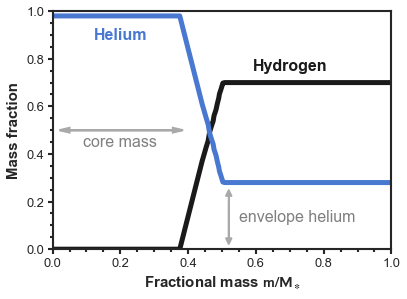

In [7]:
plt.figure(figsize=(6,4.5))

#prof = profs[0]
prof = track.profiles[0]
x = prof.mass / np.max(prof.mass)
plt.plot(x, prof.x_mass_fraction_H, lw=5, label='hydrogen', c='k')
plt.plot(x, prof.y_mass_fraction_He, lw=5, label='helium', c='b')

#for prof in track.profiles:
#    x = prof.mass / np.max(prof.mass)
#    plt.plot(x, prof.x_mass_fraction_H, lw=1, label='hydrogen', c='k', alpha=0.5, zorder=-99)
#    plt.plot(x, prof.y_mass_fraction_He, lw=1, label='helium', c='b', alpha=0.5, zorder=-99)

plt.text(0.25*(4/5), 0.88, 'Helium', c='b', ha='center', weight='bold', size=16)
plt.text(0.7, 0.75, 'Hydrogen', c='k', ha='center', weight='bold', size=16)

plt.arrow(0.025, 0.5,  0.45*(4/5), 0, color='darkgray', lw=2, head_width=0.02, shape='full', length_includes_head=True)
plt.arrow(0.475*(4/5), 0.5, -0.45*(4/5), 0, color='darkgray', lw=2, head_width=0.02, shape='full', length_includes_head=True)
plt.text(0.25*(4/5), 0.43, 'core mass', ha='center', c='gray', size=16)

plt.arrow(0.57-0.05, 0.05, 0, 0.28-0.08, color='darkgray', lw=1.5, head_width=0.018, shape='full', length_includes_head=True)
plt.arrow(0.57-0.05, 0.2, 0, -0.18, color='darkgray', lw=1.5, head_width=0.018, shape='full', length_includes_head=True)
plt.text(0.55, 0.115, 'envelope helium', c='gray', size=16)

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel(r'Fractional mass $\mathbf{m/M_\ast}$')
plt.ylabel(r'Mass fraction')
#plt.legend()
plt.tight_layout()
#plt.savefig('figs/merger.pdf')

In [11]:
#plt.figure(figsize=(6,4.5))
def plot_profile(prof_num):
    #plt.figure(figsize=(6,4.5))

    prof = track.profiles[prof_num]
    x = prof.mass / np.max(prof.mass)
    plt.plot(x, prof.x_mass_fraction_H, lw=5, label='hydrogen', c='k')
    plt.plot(x, prof.y_mass_fraction_He, lw=5, label='helium', c='b')
    plt.title('%.2g Myr'%(track.history.star_age[prof_num]/1e6))

    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel(r'Fractional mass $\mathbf{m/M_\ast}$')
    plt.ylabel(r'Mass fraction')
    plt.tight_layout()
    #plt.show()

interact(plot_profile, prof_num=IntSlider(min=0, max=len(track.profiles)-1, step=1, value=0));

interactive(children=(IntSlider(value=0, description='prof_num', max=245), Output()), _dom_classes=('widget-in…

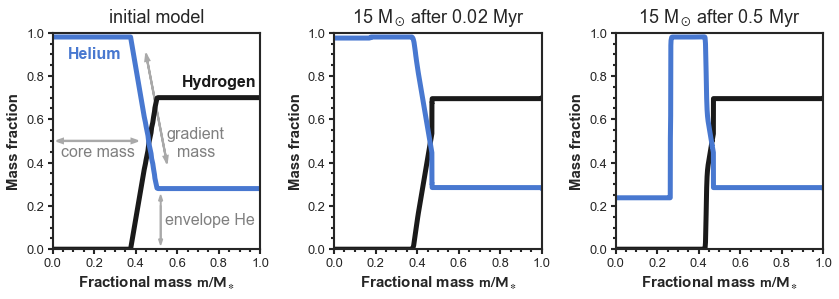

In [13]:
plt.figure(figsize=(6*2,4.5))
plt.subplot(131)
plot_profile(0)
plt.title('initial model')
plt.text(0.25*(4/5), 0.88, 'Helium', c='b', ha='center', weight='bold', size=16)
plt.text(0.8, 0.75, 'Hydrogen', c='k', ha='center', weight='bold', size=16)
#plt.axvline(0.46, ls='--', c='lightgray', zorder=-999, lw=2)
#plt.grid(ls='--', c='lightgray', zorder=-999, lw=1, which='minor')

plt.arrow(0.05, 0.5,  0.45*(4/5), 0, color='darkgray', lw=2, head_width=0.02, shape='full', length_includes_head=True)
plt.arrow(0.475*(4/5), 0.5, -0.45*(4/5), 0, color='darkgray', lw=2, head_width=0.02, shape='full', length_includes_head=True)
plt.text(0.27*(4/5), 0.43, 'core mass', ha='center', c='gray', size=16)

plt.arrow(0.45, 0.9, 0.1, -0.5, color='darkgray', lw=2, head_width=0.02, shape='full', length_includes_head=True)
plt.arrow(0.55, 0.4, -0.1, 0.5, color='darkgray', lw=2, head_width=0.02, shape='full', length_includes_head=True)
plt.text(0.69, 0.43, 'gradient\nmass', ha='center', c='gray', size=16)

plt.arrow(0.57-0.05, 0.05, 0, 0.28-0.08, color='darkgray', lw=1.5, head_width=0.018, shape='full', length_includes_head=True)
plt.arrow(0.57-0.05, 0.2, 0, -0.18, color='darkgray', lw=1.5, head_width=0.018, shape='full', length_includes_head=True)
plt.text(0.54, 0.115, 'envelope He', c='gray', size=16)


plt.subplot(132)
plot_profile(145)
plt.title(r'15 M$_\odot$ after 0.02 Myr')
#plt.axvline(0.46, ls='--', c='lightgray', zorder=-999, lw=2)
#plt.grid(ls='--', c='lightgray', zorder=-999, lw=1, which='minor')


plt.subplot(133)
plot_profile(229)
plt.title(r'15 M$_\odot$ after 0.5 Myr')
#plt.axvline(0.46, ls='--', c='lightgray', zorder=-999, lw=2)
#plt.grid(ls='--', c='lightgray', zorder=-999, lw=1, which='minor')

plt.tight_layout()
plt.savefig('figs/merger.pdf')

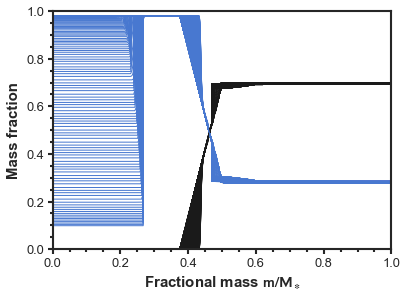

In [10]:
plt.figure(figsize=(6,4.5))

for prof in track.profiles:
    x = prof.mass / np.max(prof.mass)
    plt.plot(x, prof.x_mass_fraction_H, lw=1, label='hydrogen', c='k', zorder=-99)
    plt.plot(x, prof.y_mass_fraction_He, lw=1, label='helium', c='b', zorder=-99)

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel(r'Fractional mass $\mathbf{m/M_\ast}$')
plt.ylabel(r'Mass fraction')
#plt.legend()
plt.tight_layout()
#plt.savefig('figs/merger.pdf')